In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Set a clean style for the plots
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-deep")

# ================================
# === Database Conenctions
# ================================

# Database credentials
user = "root"
password = "Root7878"
host = "localhost"
port = 3306
database = "DataWarehouse"

# Encode password safely (important if it has special chars like @ or $)
password = quote_plus(password)

# Create SQLAlchemy engine
try:
    engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")
    
    # Load data into DataFrame
    query = "SELECT * FROM report_customers;"
    df = pd.read_sql(query, engine)
    
    print("DataFrame Head:")
    print(df.head())
    print("-" * 50)
    
except Exception as e:
    print(f"Error connecting to the database or loading data: {e}")
    print("Please ensure your database credentials are correct and the database is running.")
    df = pd.DataFrame() # Create an empty DataFrame to prevent errors

DataFrame Head:
   customer_key customer_number      customer_name   age     age_group  \
0             1      AW00011000           Jon Yang  53.0  50 and above   
1             2      AW00011001       Eugene Huang  49.0         40-49   
2             3      AW00011002       Ruben Torres  54.0  50 and above   
3             4      AW00011003        Christy Zhu  52.0  50 and above   
4             5      AW00011004  Elizabeth Johnson  46.0         40-49   

  customer_segment last_order_date  recency  total_orders  total_sales  \
0              VIP      2013-05-03      148             3       8249.0   
1              VIP      2013-12-10      141             3       6384.0   
2              VIP      2013-02-23      150             3       8114.0   
3              VIP      2013-05-10      148             3       8139.0   
4              VIP      2013-05-01      148             3       8196.0   

   total_quantity  total_products  lifespan  avg_order_value  \
0             8.0             

# ================================
# === Data Visualizations
# ================================

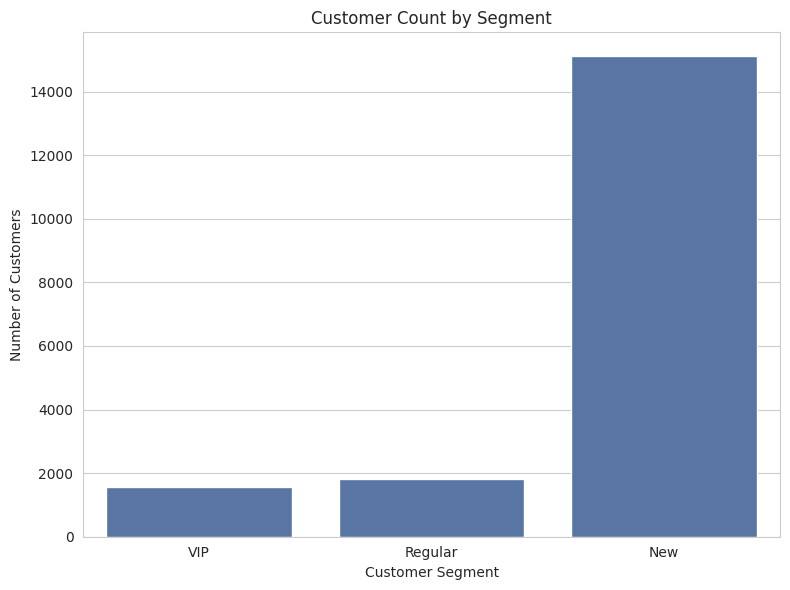

In [17]:
if not df.empty:
    # 1. Bar Chart: Customer Segment Distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='customer_segment', order=['VIP', 'Regular', 'New'])
    plt.title('Customer Count by Segment')
    plt.xlabel('Customer Segment')
    plt.ylabel('Number of Customers')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")


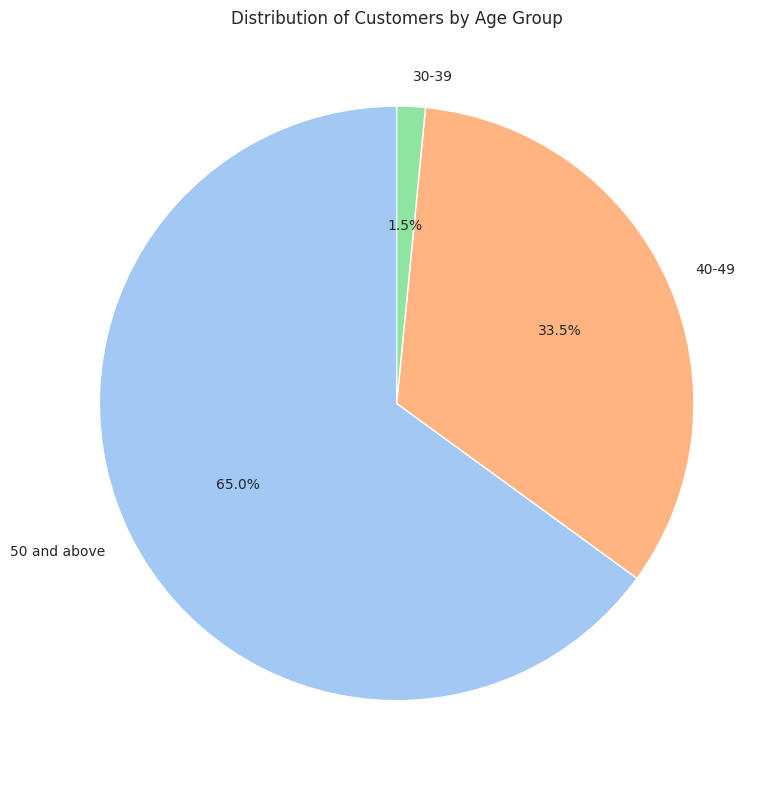

In [25]:
if not df.empty:
    # 2. Pie Chart: Age Group Distribution
    age_counts = df['age_group'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title('Distribution of Customers by Age Group')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

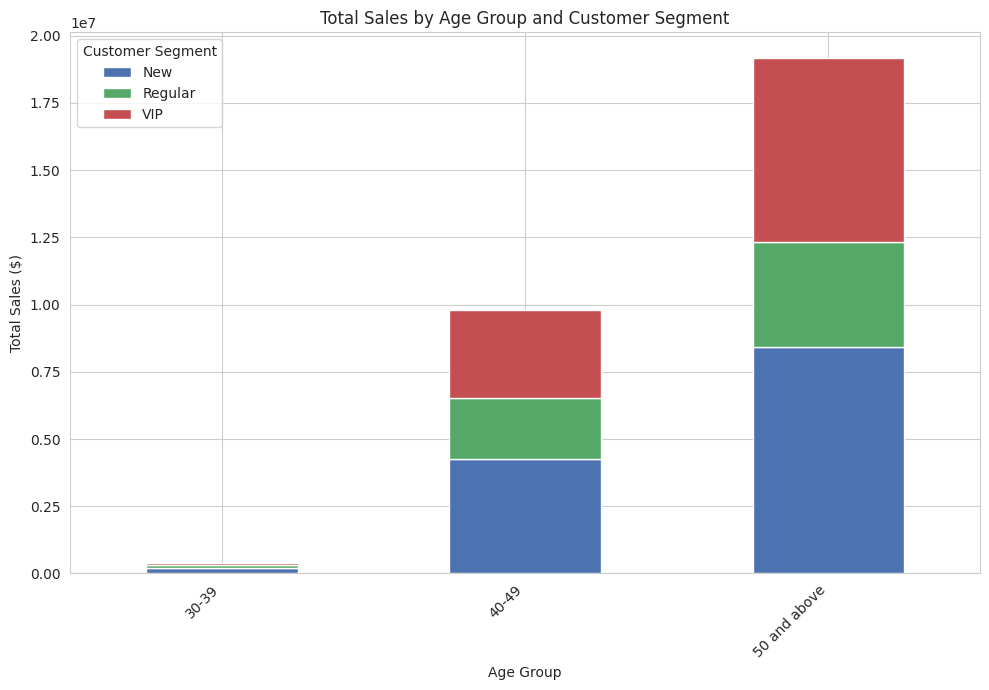

In [26]:
if not df.empty:
    # 3. Stacked Bar Chart: Total Sales by Age Group and Segment
    pivot_table = df.pivot_table(index='age_group', columns='customer_segment', values='total_sales', aggfunc='sum')
    pivot_table.plot(kind='bar', stacked=True, figsize=(10, 7))
    plt.title('Total Sales by Age Group and Customer Segment')
    plt.xlabel('Age Group')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Customer Segment')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

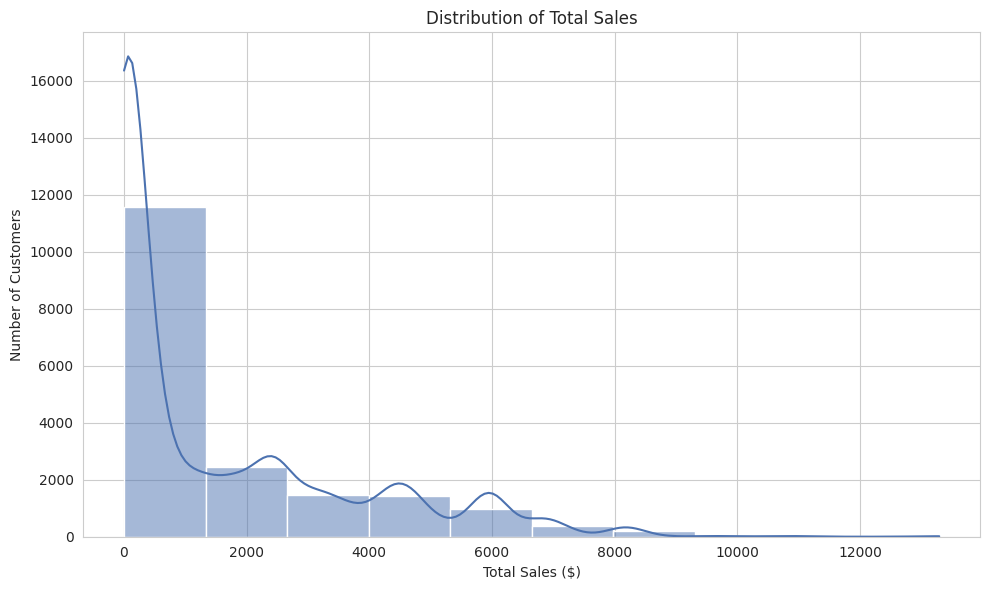

In [27]:
if not df.empty:
    # 4. Histogram: Distribution of Total Sales
    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_sales'], bins=10, kde=True)
    plt.title('Distribution of Total Sales')
    plt.xlabel('Total Sales ($)')
    plt.ylabel('Number of Customers')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

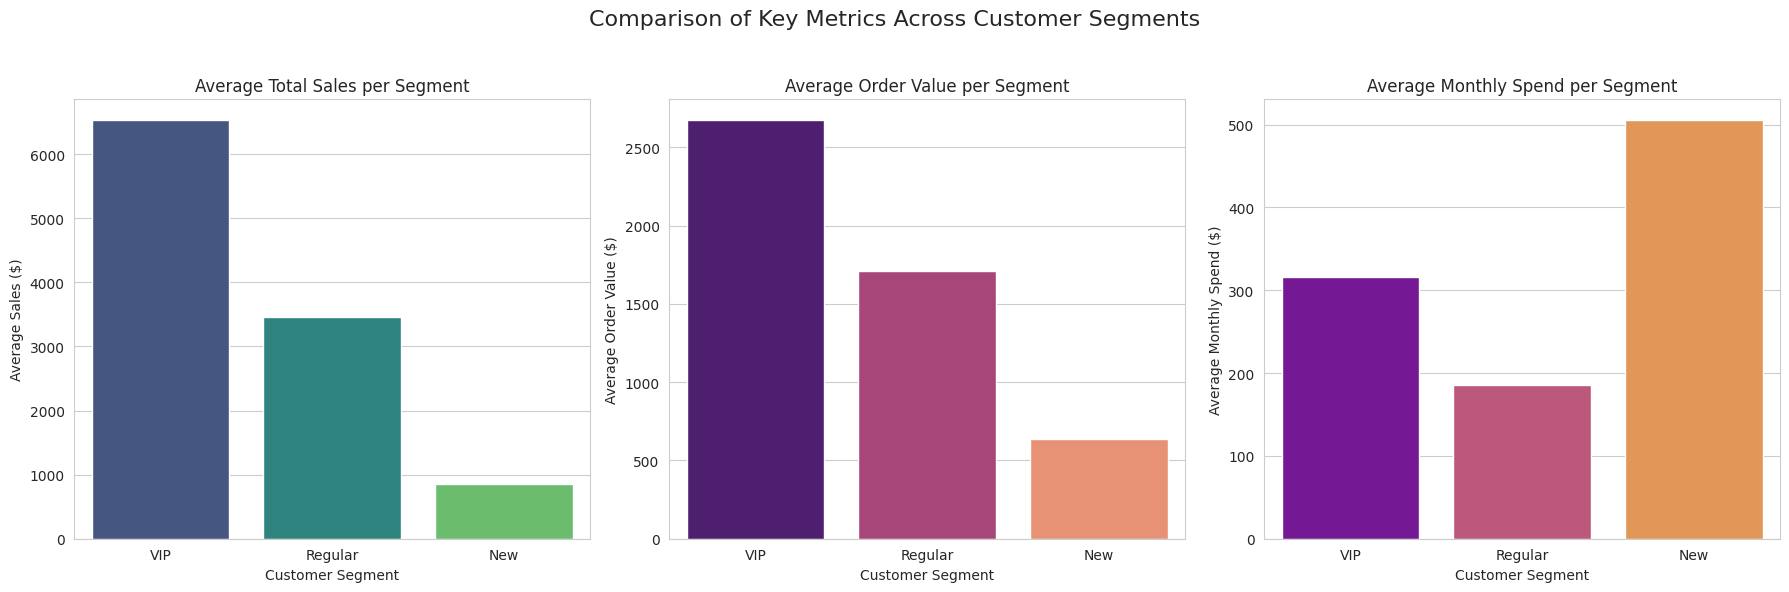

In [32]:
if not df.empty:
    # 5. Bar Chart: Average Metrics by Customer Segment
    # Aggregate data
    avg_metrics = df.groupby('customer_segment').agg(
        avg_sales=('total_sales', 'mean'),
        avg_order_value=('avg_order_value', 'mean'),
        avg_monthly_spend=('avg_monthly_spend', 'mean')
    ).reindex(['VIP', 'Regular', 'New']) # Reorder for consistency
    
    # Plotting the three metrics in subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
    sns.barplot(x=avg_metrics.index, y=avg_metrics['avg_sales'], ax=axes[0], palette="viridis", hue=avg_metrics.index, legend=False)
    axes[0].set_title('Average Total Sales per Segment')
    axes[0].set_xlabel('Customer Segment')
    axes[0].set_ylabel('Average Sales ($)')
    sns.barplot(x=avg_metrics.index, y=avg_metrics['avg_order_value'], ax=axes[1], palette="magma", hue=avg_metrics.index, legend=False)
    axes[1].set_title('Average Order Value per Segment')
    axes[1].set_xlabel('Customer Segment')
    axes[1].set_ylabel('Average Order Value ($)')
    sns.barplot(x=avg_metrics.index, y=avg_metrics['avg_monthly_spend'], ax=axes[2], palette="plasma", hue=avg_metrics.index, legend=False)
    axes[2].set_title('Average Monthly Spend per Segment')
    axes[2].set_xlabel('Customer Segment')
    axes[2].set_ylabel('Average Monthly Spend ($)')
    plt.suptitle('Comparison of Key Metrics Across Customer Segments', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

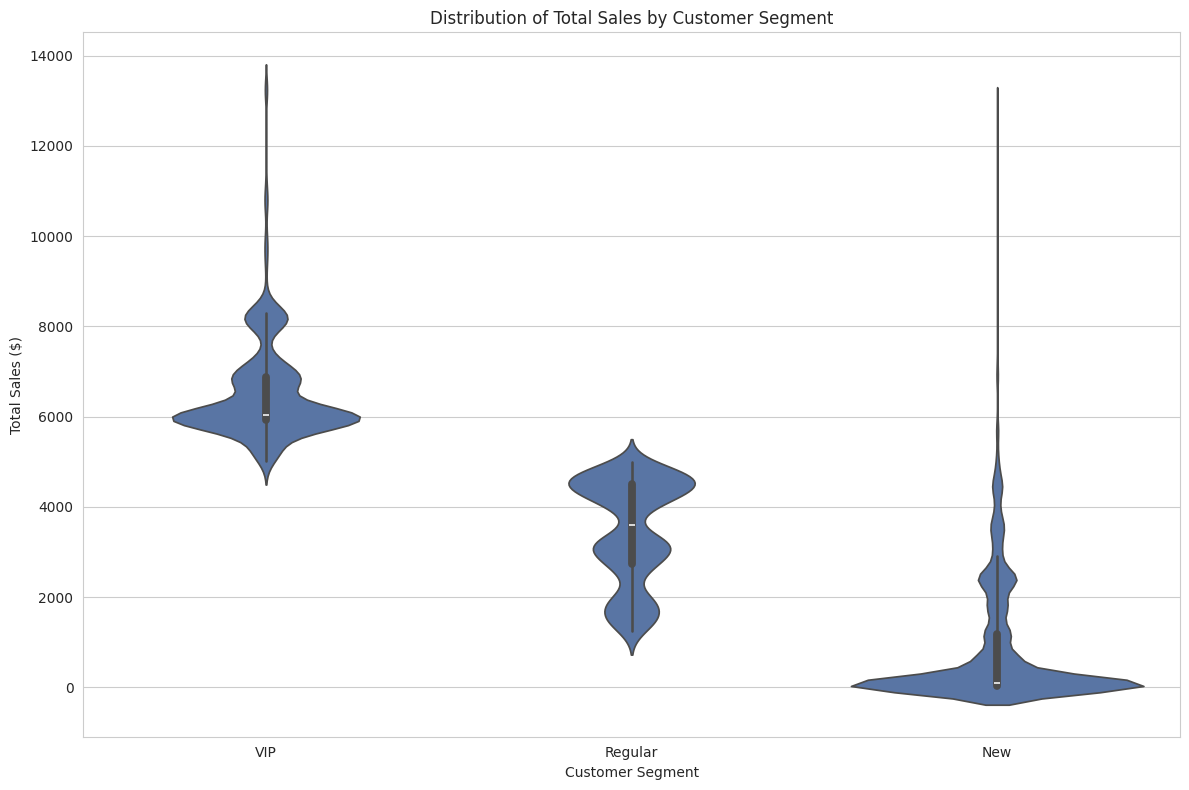

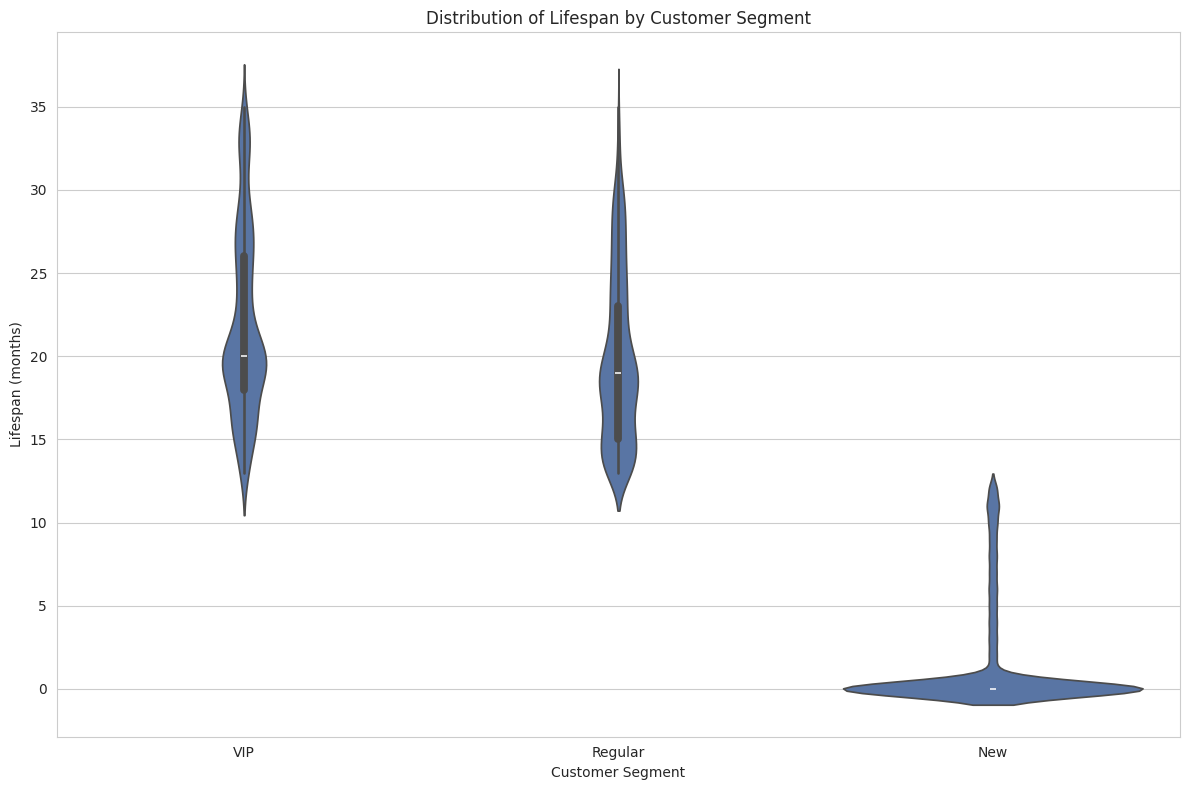

In [33]:
if not df.empty:
    # 6. Violin Plot: Lifespan vs. Total Sales
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=df, x='customer_segment', y='total_sales', order=['VIP', 'Regular', 'New'])
    plt.title('Distribution of Total Sales by Customer Segment')
    plt.xlabel('Customer Segment')
    plt.ylabel('Total Sales ($)')
    plt.tight_layout()
    plt.show()

    # You could also visualize lifespan with a separate violin plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=df, x='customer_segment', y='lifespan', order=['VIP', 'Regular', 'New'])
    plt.title('Distribution of Lifespan by Customer Segment')
    plt.xlabel('Customer Segment')
    plt.ylabel('Lifespan (months)')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

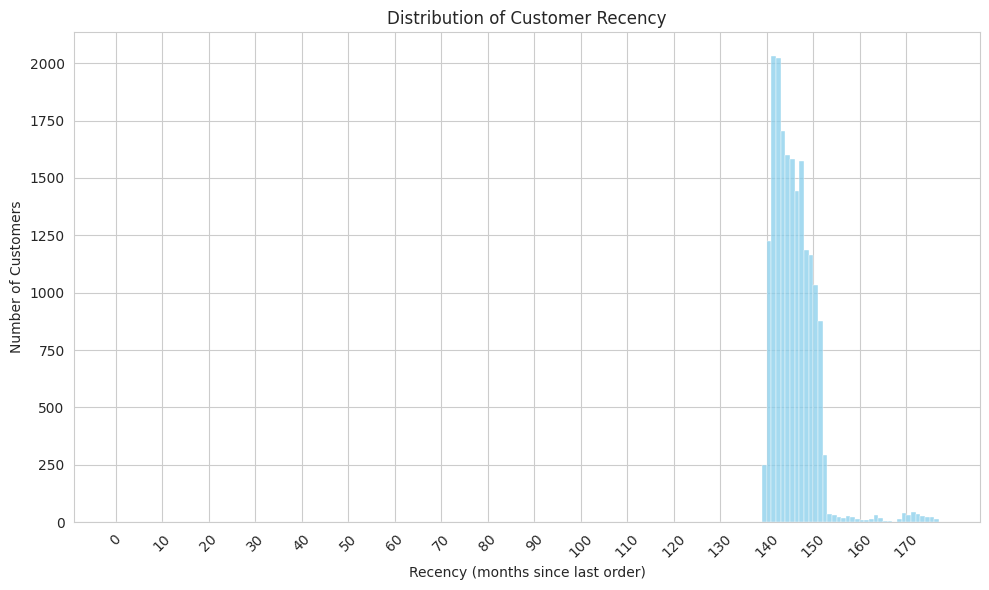

In [43]:
if not df.empty:
     # 7. Histogram: Distribution of Recency
    plt.figure(figsize=(10, 6))
    sns.histplot(df['recency'], bins=np.arange(0, df['recency'].max() + 2, 1), kde=False, color='skyblue')
    plt.title('Distribution of Customer Recency')
    plt.xlabel('Recency (months since last order)')
    plt.ylabel('Number of Customers')
    plt.xticks(np.arange(0, df['recency'].max() + 2, 10), rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

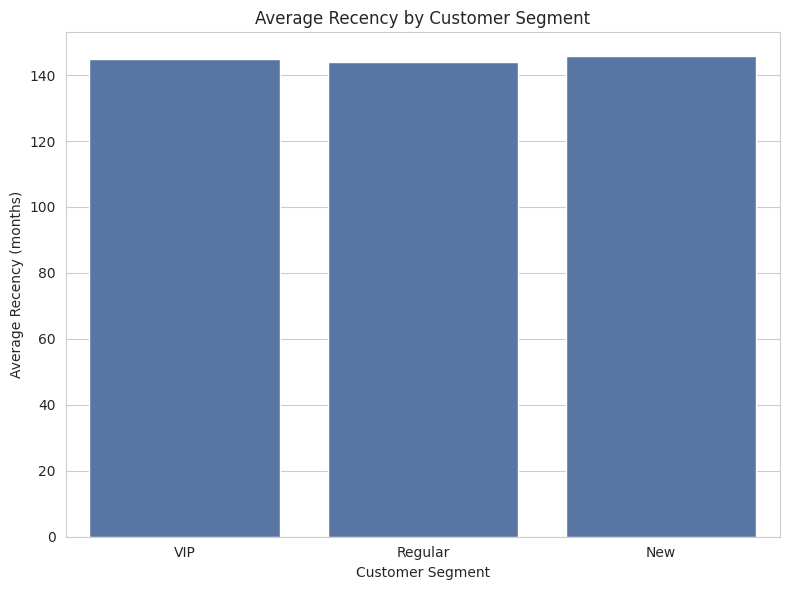

In [44]:
if not df.empty:
     # 8. Bar Chart: Average Recency by Customer Segment
    avg_recency = df.groupby('customer_segment')['recency'].mean().reindex(['VIP', 'Regular', 'New'])
    plt.figure(figsize=(8, 6))
    sns.barplot(x=avg_recency.index, y=avg_recency.values)
    plt.title('Average Recency by Customer Segment')
    plt.xlabel('Customer Segment')
    plt.ylabel('Average Recency (months)')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")